In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from sklearn.cluster import Birch

from DataSetFactory import DataSetFactory
from ClusterPlot import ClusterPlot


In [2]:
RANDOM_STATE = 42

In [3]:
ds = DataSetFactory.get_dataset('FashionMNIST64', random_state=RANDOM_STATE, is_subset=True, sample=0.15)

Taking sample of 0.15 from the data


In [4]:
ds.df.shape

(3532, 65)

In [5]:
X = ds.df[ds.feature_cols].values
y = ds.df[ds.label_col].values

In [6]:
dist_mat = pairwise_distances(X)

In [8]:
dist_mat.shape

(3532, 3532)

In [10]:
threshold_candidates = np.unique(dist_mat)

In [13]:
threshold_candidates.shape

(6600108,)

In [48]:
# for the sake of the experiment let's evaluate all of them
thresholds_df = pd.DataFrame(threshold_candidates, columns=['threshold'])
thresholds_df['num_clusters'] = np.nan
thresholds_df['num_points'] = ds.df.shape[0]

In [59]:
# Filter only thresholds smaller than 1.5
thresholds_df_sample = thresholds_df[thresholds_df['threshold']<=1.5]
thresholds_df_sample = thresholds_df_sample.sample(n=200, random_state=RANDOM_STATE)

In [60]:
def get_num_clusters_birch(ds, threshold):
    num_clusters = 0
    for label in ds.df[ds.label_col].unique():
        label_data = ds.df[ds.df[ds.label_col]==label][ds.feature_cols].values
        birch = Birch(threshold=threshold, branching_factor=2, n_clusters=None)
        birch.fit(label_data)
        num_clusters += birch.subcluster_centers_.shape[0]
    return num_clusters

thresholds_df_sample['num_clusters'] = thresholds_df_sample['threshold'].transform(lambda t: get_num_clusters_birch(ds, t))
thresholds_df_sample['compression'] = thresholds_df_sample['num_points'] / thresholds_df_sample['num_clusters']

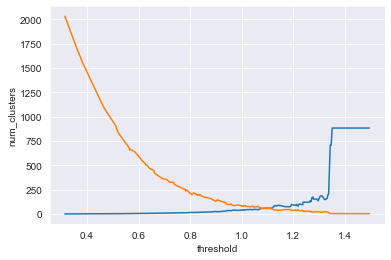

In [61]:
sns.lineplot(x='threshold', y='compression', data=thresholds_df_sample)
sns.lineplot(x='threshold', y='num_clusters', data=thresholds_df_sample)

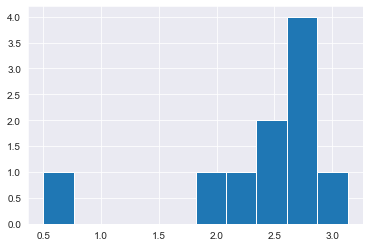

In [47]:
thresholds_df['threshold'].hist()

# Check our Blobs

In [6]:
blobs_amap = ClusterPlot(dim_reduction_algo='umap',
                reduce_all_points=False,
                n_iter=1, 
                batch_size=0,
                learning_rate=0.1,
                do_animation=False,
                dataset='FashionMNIST',
                class_to_label=ds.class_to_label,
                show_fig=True,
                save_fig=True,
                random_state=RANDOM_STATE,
                show_anchors=False,
                supervised=False,
                show_points=False,
                show_inner_blobs=True,
                show_polygons=True,
                show_label_level_plots=False,
                show_anchor_level_plot=False,
                annotate_images=False,
#                 birch_threshold=0.6,
                birch_threshold=1,
                alpha=None,
#                 alpha=0,
#                 douglas_peucker_tolerance=0.5,
                  douglas_peucker_tolerance=0,
                smooth_iter=3,
                alpha_voronoi=True,)
print(blobs_amap)

ClusterPlot
addr:@af3088
verbose=True
n_components=2
anchors_method='birch'
n_intra_anchors=None
birch_threshold=1
birch_branching_factor=None
dim_reduction_algo='umap'
supervised=False
umap_n_neighbors=15
umap_min_dist=1
reduce_all_points=False
uniform_points_per='anchor'
k=20
proximity_k=3
self_relation=False
radius_q=1
do_relaxation=True
top_greedy=1
magnitude_step=False
n_iter=1
batch_size=0
stop_criteria=1e-05
loss_func=<function ClusterPlot.l_inf_loss at 0x00000223B28458B8>
loss='Linf'
only_inter_relations=False
learning_rate=0.1
random_points_method='voronoi'
class_to_label={0: 'Trouser', 1: 'Sandal', 2: 'Sneaker', 3: 'Ankle boot'}
random_state=42
n_jobs=None
dataset='FashionMNIST'
show_fig=True
save_fig=True
is_plotly=False
do_animation=False
use_spline=False
alpha=None
douglas_peucker_tolerance=0
smooth_iter=3
show_relations=False
save_fig_every=1
show_points=False
show_anchors=False
show_polygons=True
show_inner_blobs=True
alpha_voronoi=True
show_label_level_plots=False
show_

finding intra class anchors using birch
UnSupervised Dim Reduction
Dim Reduction only anchors
Dim Reduction only anchors - generate random points in low dim per anchor


100%|██████████████████████████████████████████████████████████████████████████████| 3587/3587 [01:29<00:00, 39.87it/s]


Starting iteration 1 loss = 0.8355155482815058


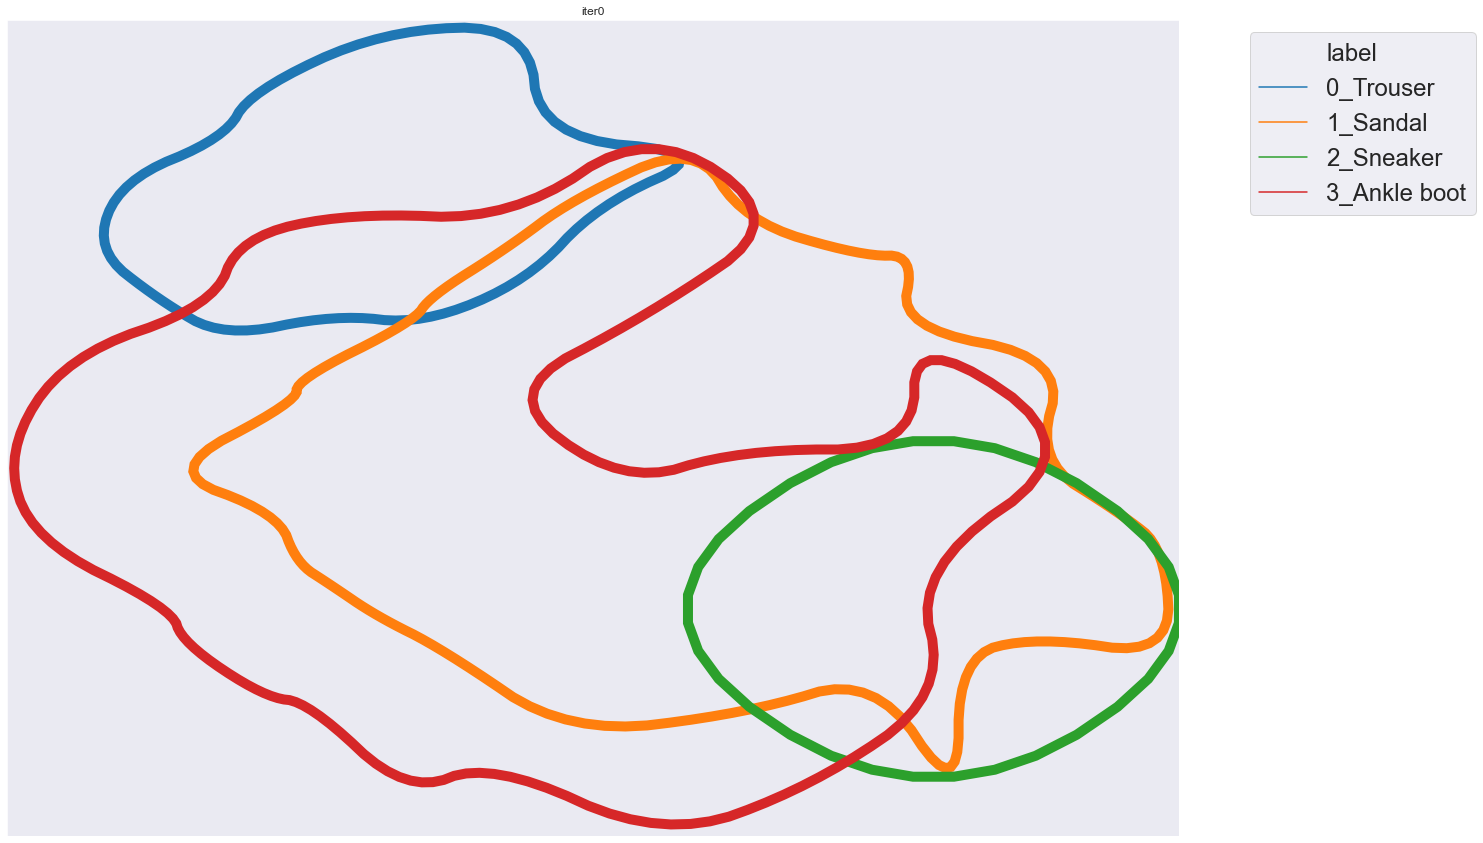

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


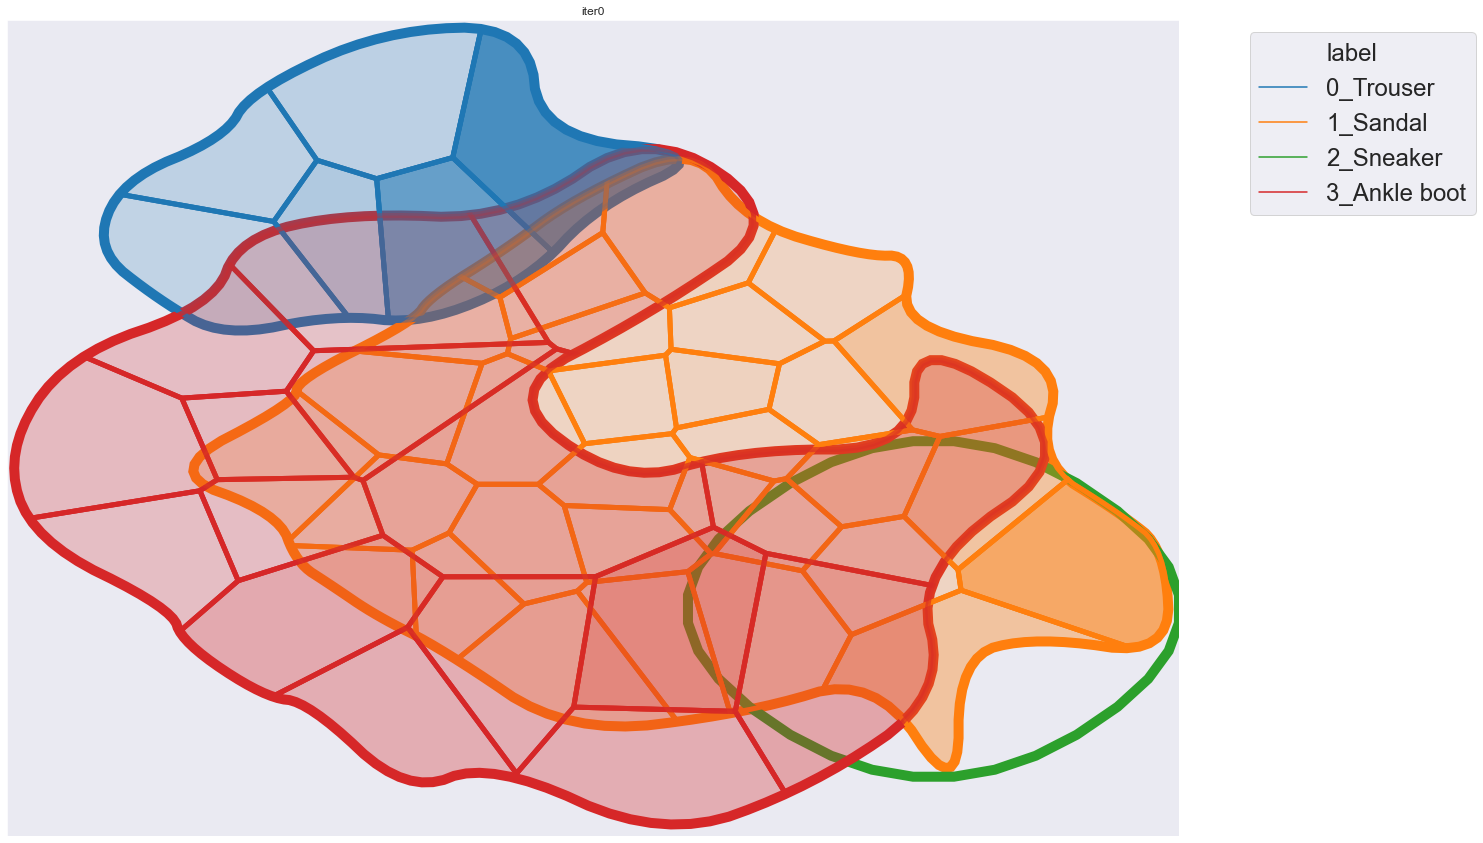

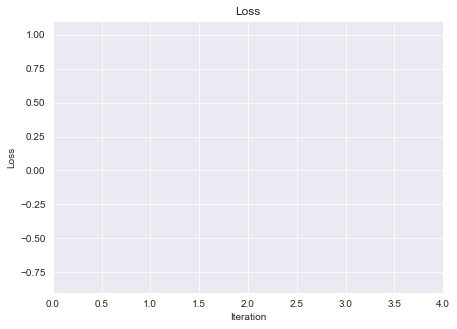

In [7]:
blobs_low_dim = blobs_amap.fit_transform(X, y)

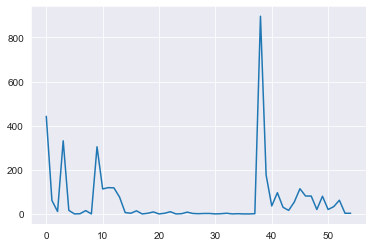

In [14]:
plt.plot(blobs_amap.anchors_density)

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
MinMaxScaler((0.2, 0.8)).fit_transform(blobs_amap.anchors_density.reshape(-1, 1)).flatten()

array([0.49631285, 0.24089385, 0.2073743 , 0.42189944, 0.21072626,
       0.2       , 0.20067039, 0.21005587, 0.2       , 0.40379888,
       0.27575419, 0.27977654, 0.27910615, 0.25094972, 0.20402235,
       0.20201117, 0.20938547, 0.2       , 0.20201117, 0.20603352,
       0.2       , 0.20201117, 0.20670391, 0.2       , 0.20067039,
       0.20536313, 0.20134078, 0.20067039, 0.20134078, 0.20134078,
       0.2       , 0.20067039, 0.20201117, 0.2       , 0.20067039,
       0.2       , 0.2       , 0.20067039, 0.8       , 0.31798883,
       0.22413408, 0.26435754, 0.22011173, 0.21072626, 0.23620112,
       0.27642458, 0.25430168, 0.25430168, 0.21340782, 0.25363128,
       0.21340782, 0.22212291, 0.24156425, 0.20201117, 0.20201117])

In [11]:
inner_blobs = []
inner_blobs.append({'path': 0, 'facecolor': 0, 'linewidth': 5, 'edgecolor': 0,
                                                   'fill': True, 'density': 0})
inner_blobs.append({'path': 0, 'facecolor': 0, 'linewidth': 5, 'edgecolor': 0,
                                                   'fill': True, 'density': 1})

In [12]:
anchors_alpha = np.array([ib['density'] for ib in inner_blobs])

In [13]:
anchors_alpha

array([0, 1])